## Gradient Descent

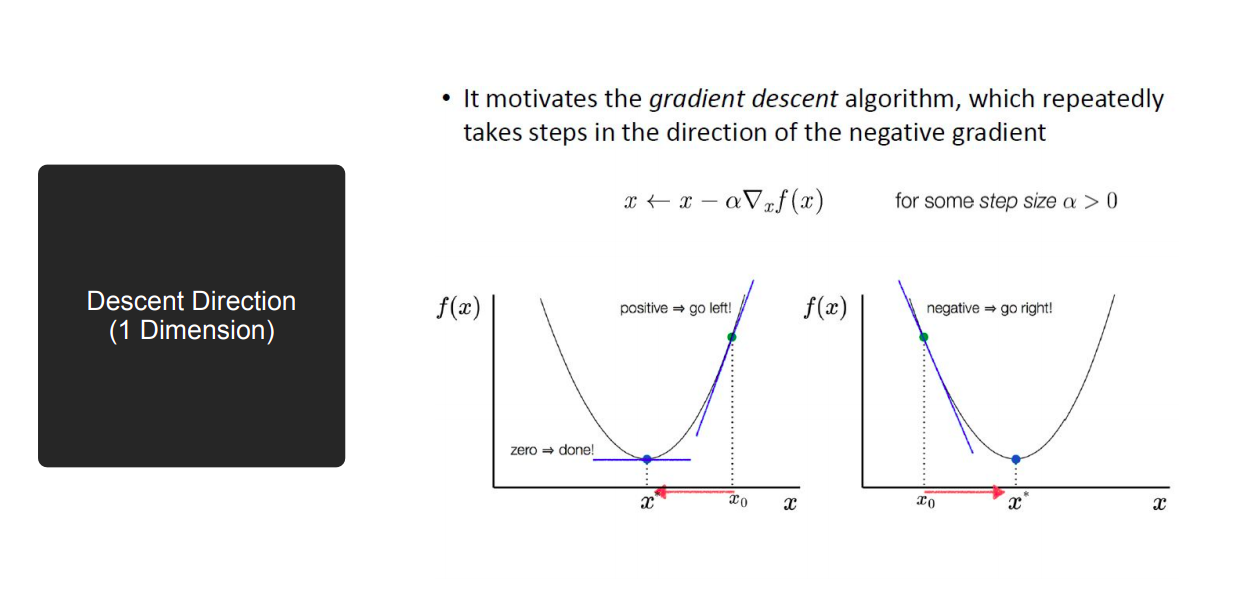

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
X = 2 * np.random.rand(100, 3)
y=[]

for i in range(len(X)):
  noise=+np.random.randn(1)
  y.append(3 + 4 * X[i][0] +1*X[i][1]+ 2*X[i][2]+noise)

y=np.array(y)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
X = 2 * np.random.rand(100, 3)
y=3 + 4 * X+np.random.randn(100,1)
y=np.array(y)

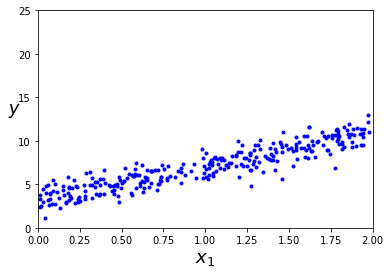

In [ ]:
plt.plot(X,y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=1, fontsize=18)
plt.axis([0, 2, 0, 25])
plt.show()

In [ ]:
X_b = np.c_[np.ones((100, 1)), X]  # add x0 = 1 to each instance
X_b[0]

array([1.        , 1.46398788, 1.19731697, 0.31203728])

![Screenshot 2021-08-09 at 09-00-29 Hands-On Machine Learning with Scikit-Learn and TensorFlow - 2-Aurélien-Géron-Hands-On-Ma[...].png](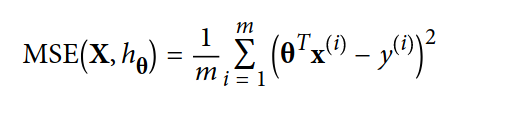)

![Screenshot 2021-08-09 at 09-00-53 Hands-On Machine Learning with Scikit-Learn and TensorFlow - 2-Aurélien-Géron-Hands-On-Ma[...].png](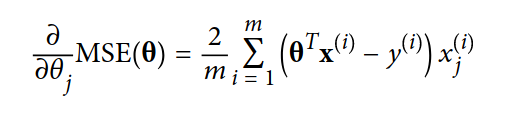)

![Screenshot 2021-08-09 at 09-01-06 Hands-On Machine Learning with Scikit-Learn and TensorFlow - 2-Aurélien-Géron-Hands-On-Ma[...].png](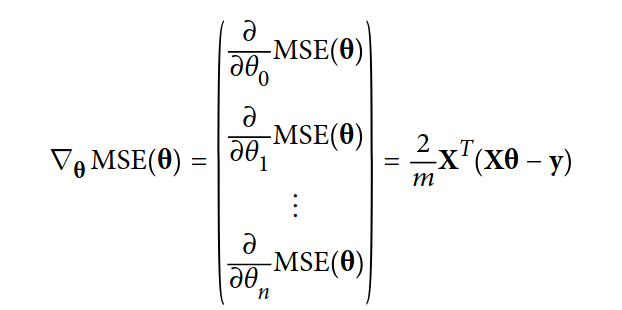)

## Batch Gradient Descent

![Screenshot 2021-08-09 at 09-01-16 Hands-On Machine Learning with Scikit-Learn and TensorFlow - 2-Aurélien-Géron-Hands-On-Ma[...].png](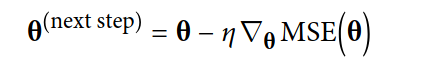)

In [ ]:
eta = 0.01  # learning rate
n_iterations = 10000
m = len(X_b)
theta = np.random.rand(4,1)  # random initialization
for iteration in range(n_iterations):
    gradients = (2/m * X_b.T.dot((X_b.dot(theta)) - y))
    theta = theta - eta * gradients
theta

array([[ 3.46920128,  3.46920128,  3.46920128],
       [ 3.64057073, -0.35942927, -0.35942927],
       [ 0.08104319,  4.08104319,  0.08104319],
       [-0.1173815 , -0.1173815 ,  3.8826185 ]])

<h2 style="color:green" align="center">Linear Regression With One Variable</h2>

The `LinearRegression` class is based on the `scipy.linalg.lstsq()` function (the name stands for "least squares"), which you could call directly:

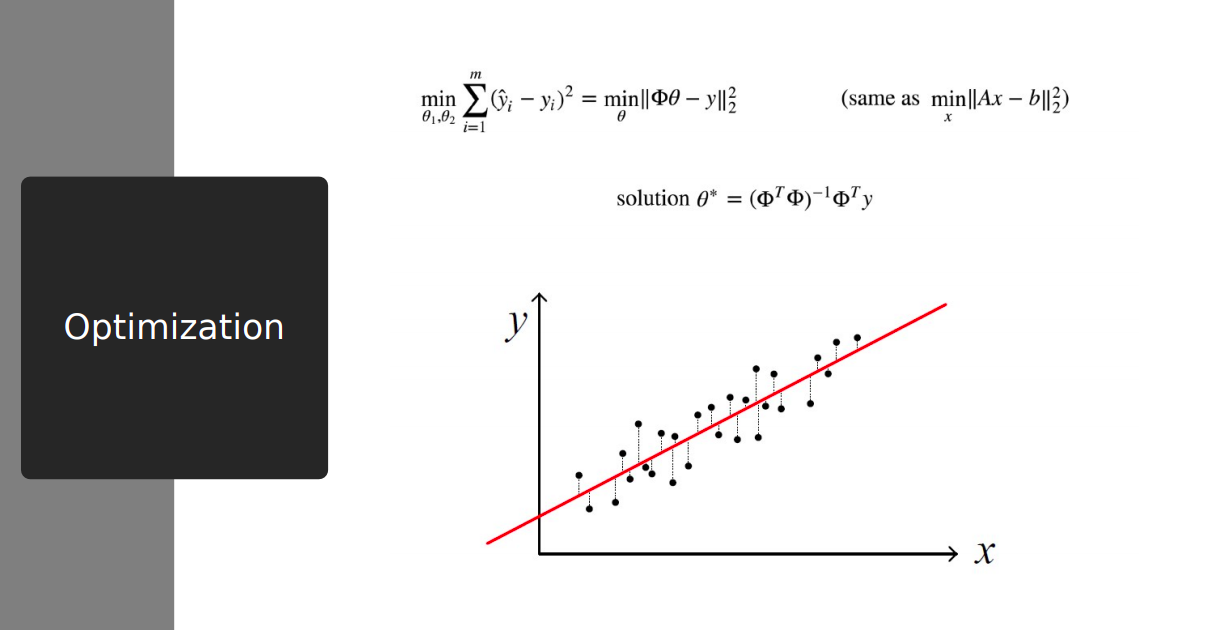

<h3 style="color:purple">Sample problem of predicting home price in California,  (USA)</h3>

**Problem Statement**: Given above data build a machine learning model that can predict home prices based on square feet area


You might remember about linear equation from your high school days math class. Home prices can be presented as following equation,

home price = m * (area) + b

Generic form of same equation is,

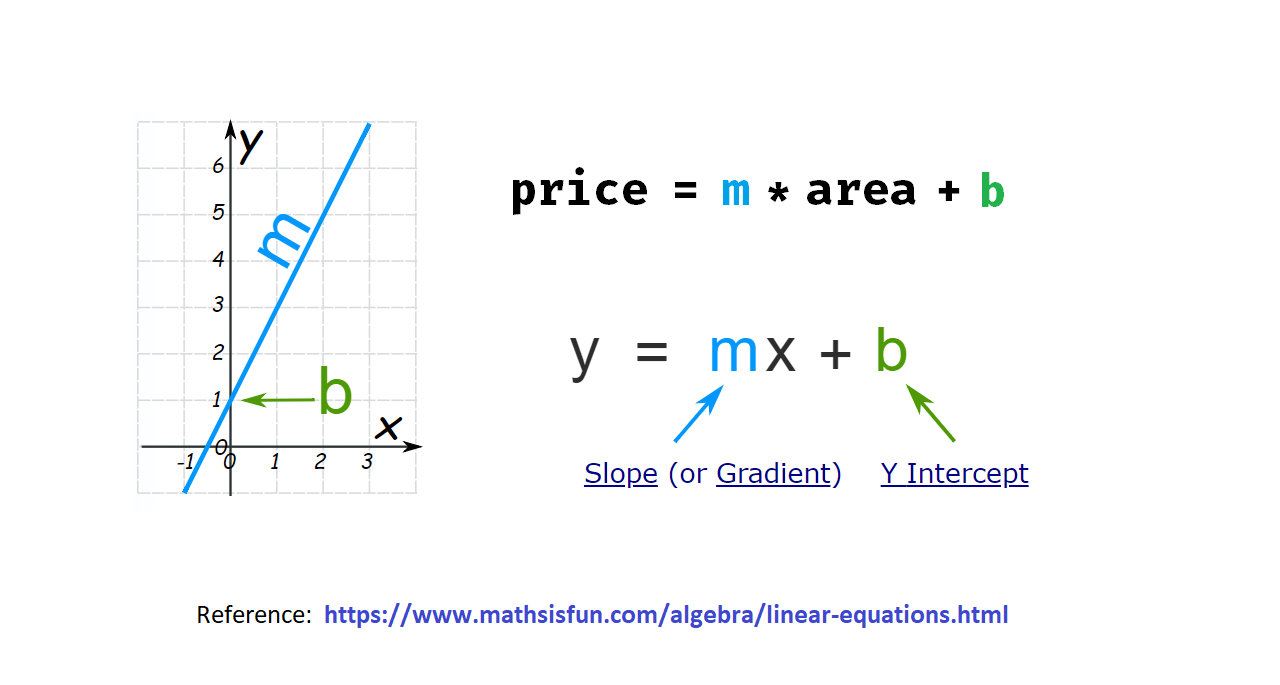

We are using pandas here you can see its [documentation](https://pandas.pydata.org/docs/reference/general_functions.html).

In [62]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt

In [61]:
df = pd.read_csv('homeprices.csv')
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


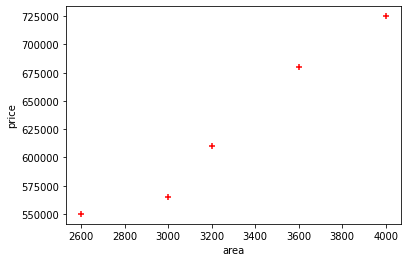

In [9]:
%matplotlib inline
plt.xlabel('area')
plt.ylabel('price')
plt.scatter(df.area,df.price,color='red',marker='+')

In [63]:
new_df = df.drop('price',axis='columns')
new_df

,area
0,2600
1,3000
2,3200
3,3600
4,4000


In [64]:
price = df.price
price

0    550000
1    565000
2    610000
3    680000
4    725000
Name: price, dtype: int64

In [65]:
# Create linear regression object
reg = linear_model.LinearRegression()
reg.fit(new_df,price)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [66]:
d=pd.read_csv('areas.csv')
d

,area
0,1000
1,1500
2,2300
3,3540
4,4120
5,4560
6,5490
7,3460
8,4750
9,2300


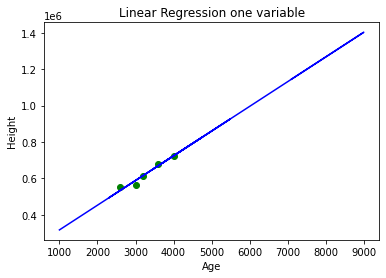

In [67]:
plt.scatter(df.area,df.price, color = 'green') 
  
plt.plot(d, reg.predict(d), color = 'blue') 
plt.title('Linear Regression one variable') 
plt.xlabel('Age') 
plt.ylabel('Height') 
  
plt.show()

**(1) Predict price of a home with area = 3300 sqr ft**

In [71]:
reg.predict([[3300]])

array([180616.43835616])

In [68]:
reg.coef_

array([135.78767123])

In [69]:
reg.intercept_

180616.43835616432

**Y = m * X + b (m is coefficient and b is intercept)**

In [ ]:
3300*135.78767123 + 180616.43835616432

628715.7534151643

<h2 style="color:green" align="center">  Linear Regression Multiple Variables</h2>




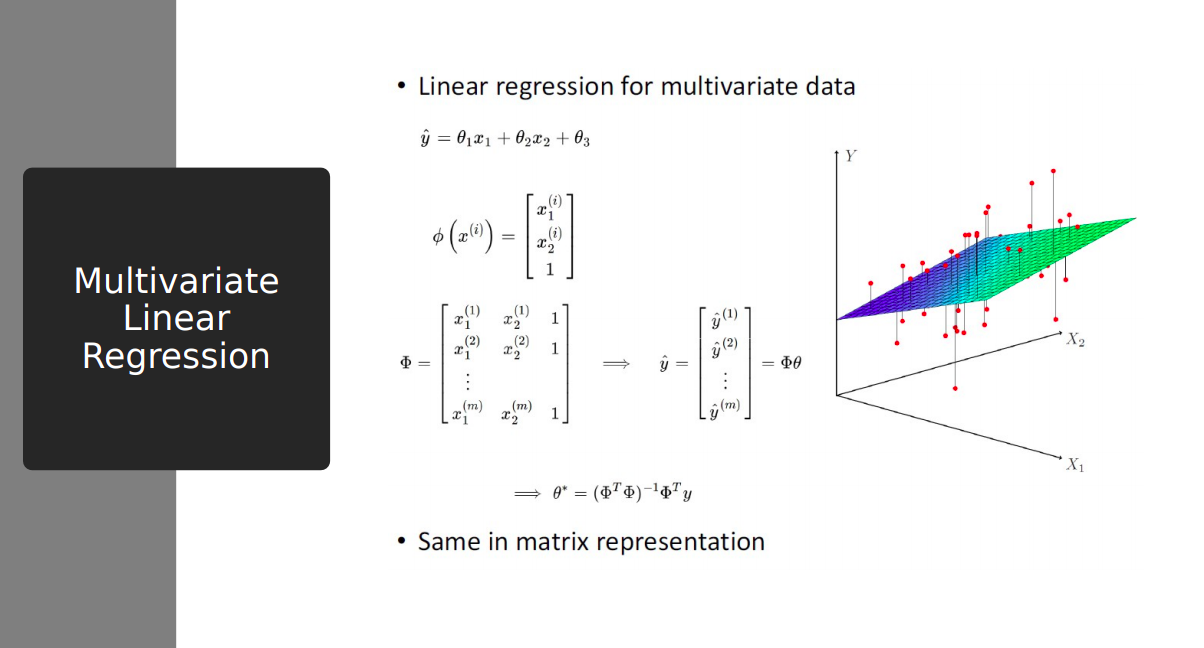

<h3 style="color:purple">Sample problem of predicting home price in California (USA)</h3>

The data contains home prices in monroe twp, NJ. Here price depends on **area (square feet), bed rooms and age of the home (in years)**. Given these prices we have to predict prices of new homes based on area, bed rooms and age.

We will use regression with multiple variables here. Price can be calculated using following equation,

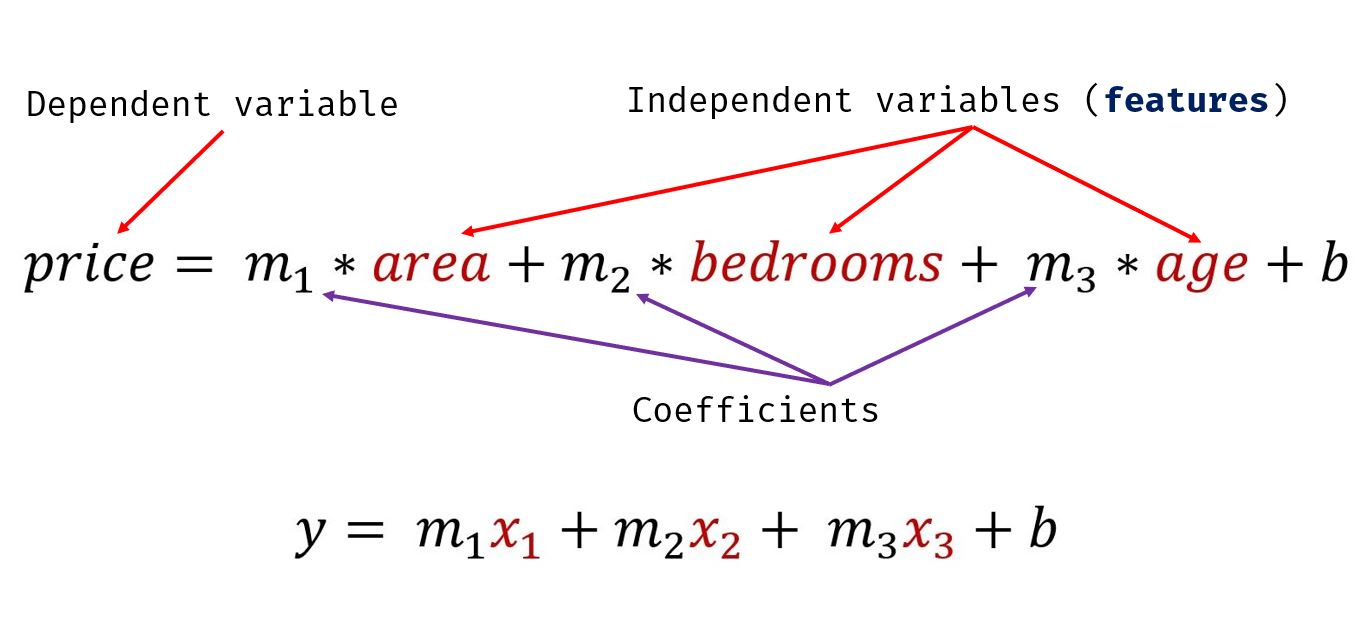

Here area, bedrooms, age are called independant variables or **features** whereas price is a dependant variable

In [72]:
import pandas as pd
import numpy as np
from sklearn import linear_model

In [73]:
df = pd.read_csv('homeprices1.csv')
df

,area,bedrooms,age,price
0,2600,3,20,550000
1,3000,4,15,565000
2,3200,4,18,610000
3,3600,3,30,595000
4,4000,5,8,760000
5,4100,6,8,810000


In [74]:
reg = linear_model.LinearRegression()
reg.fit(df.drop('price',axis='columns'),df.price)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [75]:
reg.coef_

array([  112.06244194, 23388.88007794, -3231.71790863])

In [76]:
reg.intercept_

221323.00186540396

In [77]:
reg.predict([[3000, 3, 40]])

array([498408.25158031])

In [21]:
112.06244194*3000 + 23388.88007794*3 + -3231.71790863*40 + 221323.00186540384

498408.25157402386

<h2 style="color:green" align="center">Polynomial Regression With One Variable</h2>

In [78]:
import pandas as pd
import numpy as np
from sklearn import linear_model

In [79]:
df = pd.read_csv('homeprices.csv')
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


In [80]:
from sklearn.preprocessing import PolynomialFeatures 

In [86]:
polynom = PolynomialFeatures(degree = 3, include_bias=False) 
X_polynom = polynom.fit_transform(df.drop('price',axis='columns')) 
X_polynom

array([[2.6000e+03, 6.7600e+06, 1.7576e+10],
       [3.0000e+03, 9.0000e+06, 2.7000e+10],
       [3.2000e+03, 1.0240e+07, 3.2768e+10],
       [3.6000e+03, 1.2960e+07, 4.6656e+10],
       [4.0000e+03, 1.6000e+07, 6.4000e+10]])

In [87]:
reg = linear_model.LinearRegression()
reg.fit(X_polynom,df.price)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [93]:
reg.coef_

array([-5.08191218e+03,  1.57417040e+00, -1.56287369e-04])

In [94]:
reg.intercept_

5867795.964111712

In [95]:
d=[[1000],[2200],[2700],[3400],[4200]]

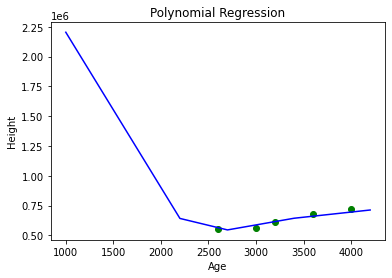

In [96]:
plt.scatter(df.area,df.price, color = 'green') 
  
plt.plot(d, reg.predict(polynom.fit_transform(d)), color = 'blue') 
plt.title('Polynomial Regression') 
plt.xlabel('Age') 
plt.ylabel('Height') 
  
plt.show()

In [97]:
z = polynom.fit_transform([[3000]]) 
reg.predict(z)

array([569834.08071153])

In [60]:
a=3000*-5.08191218e+03 + (3000**2)*1.57417040 + (3000**3)*-0.000156287369+5867795.964111712
a

569834.0611117119

<h2 style="color:green" align="center">Polynomial Regression Multiple variables</h2>

In [98]:
import pandas as pd
import numpy as np
from sklearn import linear_model

In [99]:
df = pd.read_csv('homeprices1.csv')
df

,area,bedrooms,age,price
0,2600,3,20,550000
1,3000,4,15,565000
2,3200,4,18,610000
3,3600,3,30,595000
4,4000,5,8,760000
5,4100,6,8,810000


In [100]:
from sklearn.preprocessing import PolynomialFeatures 


In [110]:
polynom = PolynomialFeatures(degree = 2, include_bias=False) 
X_polynom = polynom.fit_transform(df.drop('price',axis='columns')) 
X_polynom

array([[2.600e+03, 3.000e+00, 2.000e+01, 6.760e+06, 7.800e+03, 5.200e+04,
        9.000e+00, 6.000e+01, 4.000e+02],
       [3.000e+03, 4.000e+00, 1.500e+01, 9.000e+06, 1.200e+04, 4.500e+04,
        1.600e+01, 6.000e+01, 2.250e+02],
       [3.200e+03, 4.000e+00, 1.800e+01, 1.024e+07, 1.280e+04, 5.760e+04,
        1.600e+01, 7.200e+01, 3.240e+02],
       [3.600e+03, 3.000e+00, 3.000e+01, 1.296e+07, 1.080e+04, 1.080e+05,
        9.000e+00, 9.000e+01, 9.000e+02],
       [4.000e+03, 5.000e+00, 8.000e+00, 1.600e+07, 2.000e+04, 3.200e+04,
        2.500e+01, 4.000e+01, 6.400e+01],
       [4.100e+03, 6.000e+00, 8.000e+00, 1.681e+07, 2.460e+04, 3.280e+04,
        3.600e+01, 4.800e+01, 6.400e+01]])

In [111]:
reg = linear_model.LinearRegression()
reg.fit(X_polynom,df.price)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [112]:
reg.coef_

array([-2.80778483e+03, -2.41165750e+01,  2.68619833e+02,  4.36617187e-01,
       -1.02316087e+01,  2.00920018e+01, -1.90130572e+02,  1.27823911e+03,
       -1.97946475e+03])

In [113]:
reg.intercept_

4645233.512248984

In [114]:
d=[[1000],[2200],[2700],[3400],[4200]]

In [115]:
z = polynom.fit_transform([[3000, 3, 40]]) 
reg.predict(z)

array([-534404.20077555])

In [116]:
reg.predict(polynom.fit_transform([[2500, 4, 5]]) )

array([477745.4974285])

# Overfitting

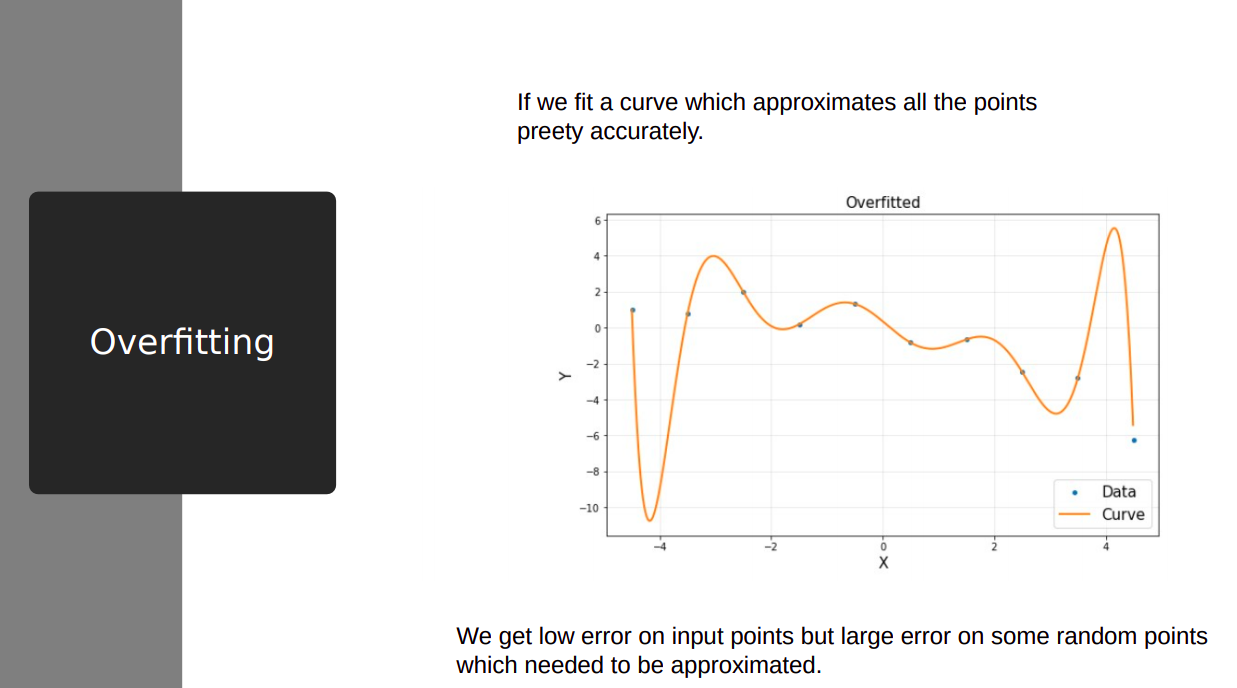

In [117]:
import numpy as np
import matplotlib.pyplot as plt
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)
X_new=np.linspace(-3, 3, 100).reshape(100, 1)

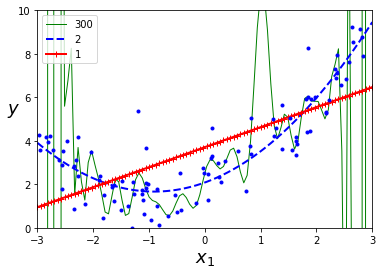

In [119]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
for style, width, degree in (("g-", 1, 300), ("b--", 2, 2), ("r-+", 2, 1)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig, style, label=str(degree), linewidth=width)

plt.plot(X, y, "b.")
plt.legend(loc="upper left")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()

# Regularized models

In [120]:
import numpy as np
np.random.seed(42)
m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) 
X_new = np.linspace(0, 3, 100).reshape(100, 1)

In [5]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1)
ridge_reg.fit(X, y)

Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

In [121]:
ridge_reg.coef_

array([[0.30874991]])

In [122]:
ridge_reg.intercept_

array([0.98979269])

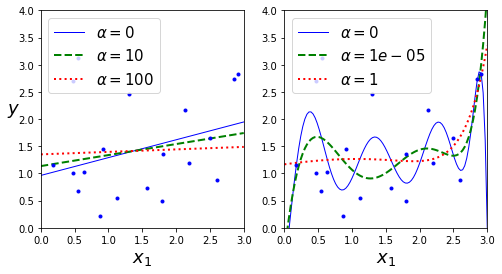

In [123]:
from sklearn.linear_model import Ridge

def plot_model(model_class, polynomial, alphas, **model_kargs):
    for alpha, style in zip(alphas, ("b-", "g--", "r:")):
        model = model_class(alpha, **model_kargs) if alpha > 0 else LinearRegression()
        if polynomial:
            model = Pipeline([
                    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
                    ("std_scaler", StandardScaler()),
                    ("regul_reg", model),
                ])
        model.fit(X, y)
        y_new_regul = model.predict(X_new)
        lw = 2 if alpha > 0 else 1
        plt.plot(X_new, y_new_regul, style, linewidth=lw, label=r"$\alpha = {}$".format(alpha))
    plt.plot(X, y, "b.", linewidth=3)
    plt.legend(loc="upper left", fontsize=15)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 3, 0, 4])

plt.figure(figsize=(8,4))
plt.subplot(121)
plot_model(Ridge, polynomial=False, alphas=(0, 10, 100), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Ridge, polynomial=True, alphas=(0, 10**-5, 1), random_state=42)
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.306747378010915, tolerance: 0.0017247947421705277
  positive)


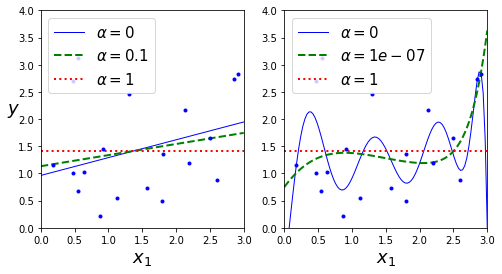

In [125]:
from sklearn.linear_model import Lasso

plt.figure(figsize=(8,4))
plt.subplot(121)
plot_model(Lasso, polynomial=False, alphas=(0, 0.1, 1), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Lasso, polynomial=True, alphas=(0, 10**-7, 1), random_state=42)
plt.show()

In [126]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([1.43966096])